When Katie was working on the Enron POI identifier, she engineered a feature that identified when a given person was on the same email as a POI. So for example, if Ken Lay and Katie Malone are both recipients of the same email message, then Katie Malone should have her "shared receipt" feature incremented. If she shares lots of emails with POIs, maybe she's a POI herself.

Here's the problem: there was a subtle bug, that Ken Lay's "shared receipt" counter would also be incremented when this happens. And of course, then Ken Lay always shares receipt with a POI, because he is a POI. So the "shared receipt" feature became extremely powerful in finding POIs, because it effectively was encoding the label for each person as a feature.

We found this first by being suspicious of a classifier that was always returning 100% accuracy. Then we removed features one at a time, and found that this feature was driving all the performance. Then, digging back through the feature code, we found the bug outlined above. We changed the code so that a person's "shared receipt" feature was only incremented if there was a different POI who received the email, reran the code, and tried again. The accuracy dropped to a more reasonable level.

We take a couple of lessons from this:

Anyone can make mistakes--be skeptical of your results!
100% accuracy should generally make you suspicious. Extraordinary claims require extraordinary proof.
If there's a feature that tracks your labels a little too closely, it's very likely a bug!
If you're sure it's not a bug, you probably don't need machine learning--you can just use that feature alone to assign labels.

# Getting Rid of Features

1. if the feature is noisy
2. it causes overfitting
3. it is strongly related (highly correlated) with a feature that's already present
4. additional feature slows down training/testing process

## Features sometimes do not give information

Features != Information (quality)

Lots of features, but may not be of quality. Bare number of features that give max info.

## Univariate Feature Selection

There are several go-to methods of automatically selecting your features in sklearn. Many of them fall under the umbrella of univariate feature selection, which treats each feature independently and asks how much power it gives you in classifying or regressing.

There are two big univariate feature selection tools in sklearn: SelectPercentile and SelectKBest. The difference is pretty apparent by the names: SelectPercentile selects the X% of features that are most powerful (where X is a parameter) and SelectKBest selects the K features that are most powerful (where K is a parameter).

A clear candidate for feature reduction is text learning, since the data has such high dimension. We actually did feature selection in the Sara/Chris email classification problem during the first few mini-projects; you can see it in the code in tools/email_preprocess.py .
Automatically selecting features in sklearn.


## Feature Selection in TfIdf Vectorizer

TfIdf vectorizer argument max_df:

- Value indicates how much frequency of words is desired (to decrease features, dimensionality)

For example, if 0.50, 50% of words that occur frequently are removed.

```
vectorizer = TfIdfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words='english')
```

Recall function preprocess:

https://github.com/mudspringhiker/intro_to_machine_learning/blob/master/naive_bayes/Miniproject_naive_bayes.ipynb

## Bias, Variance and Number of Features

Bias-variance dilemma is related to number of features

In [1]:
from IPython.display import Image

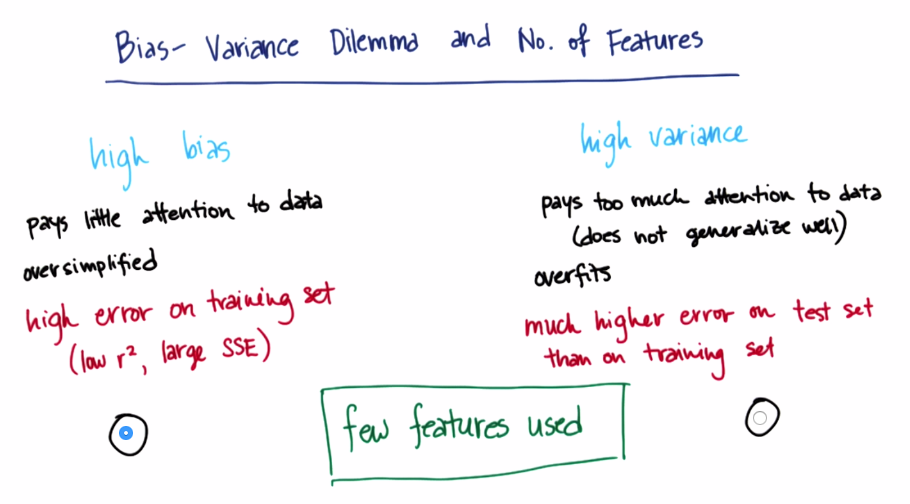

In [2]:
Image('biasvariancefeaturenumbers.png')

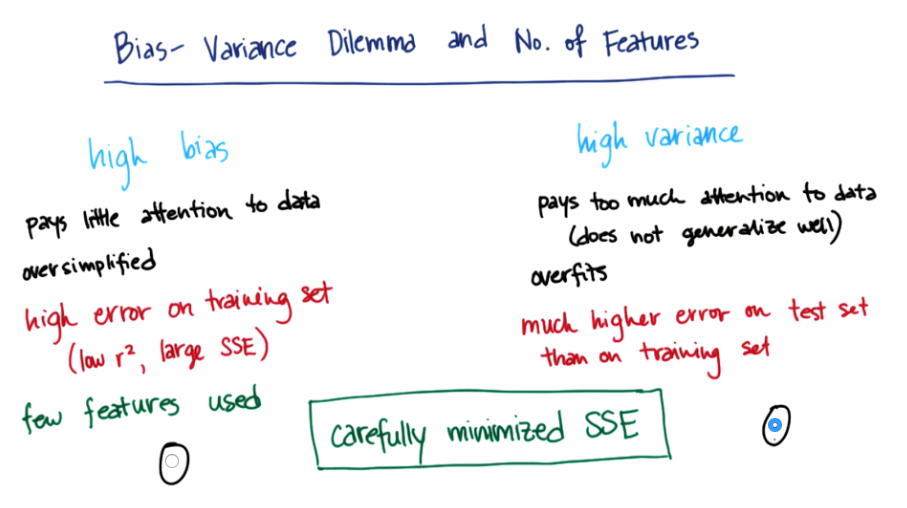

In [3]:
Image('highvariance.png')

A balance is needed between two (simplicity and goodness of fit).

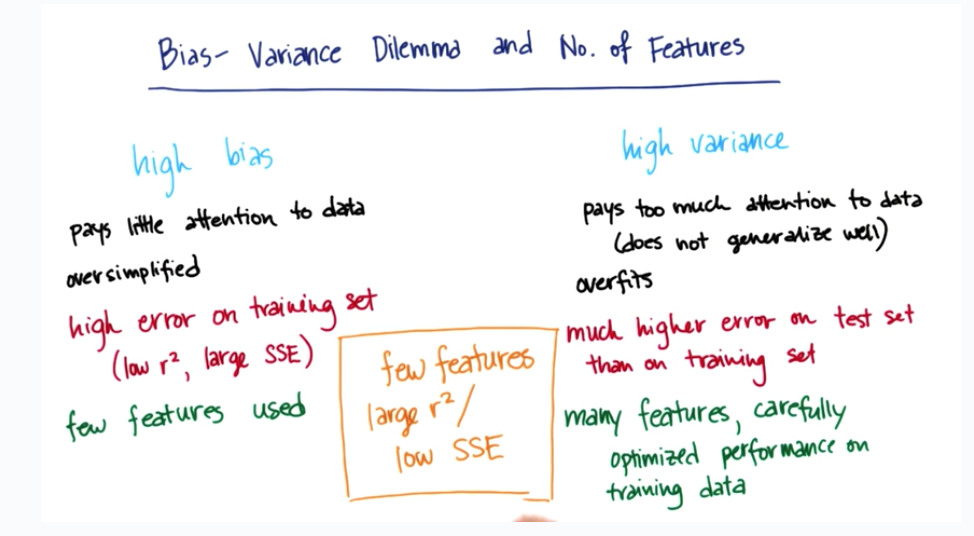

In [4]:
Image('balance.png')

Optimal point can be calculated by algorithm.

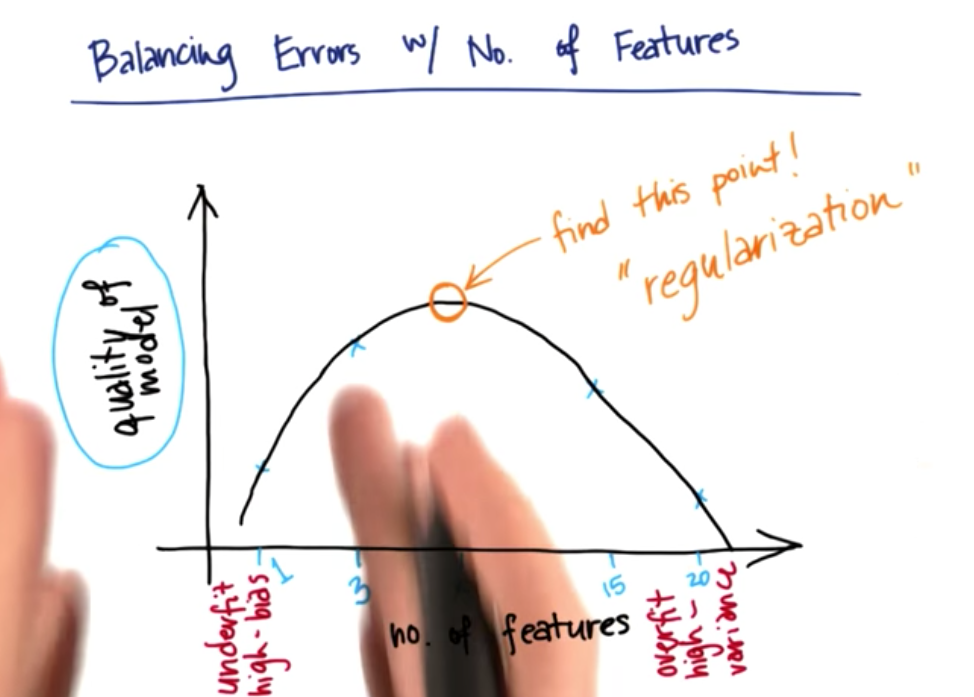

In [5]:
Image('regularization.png')

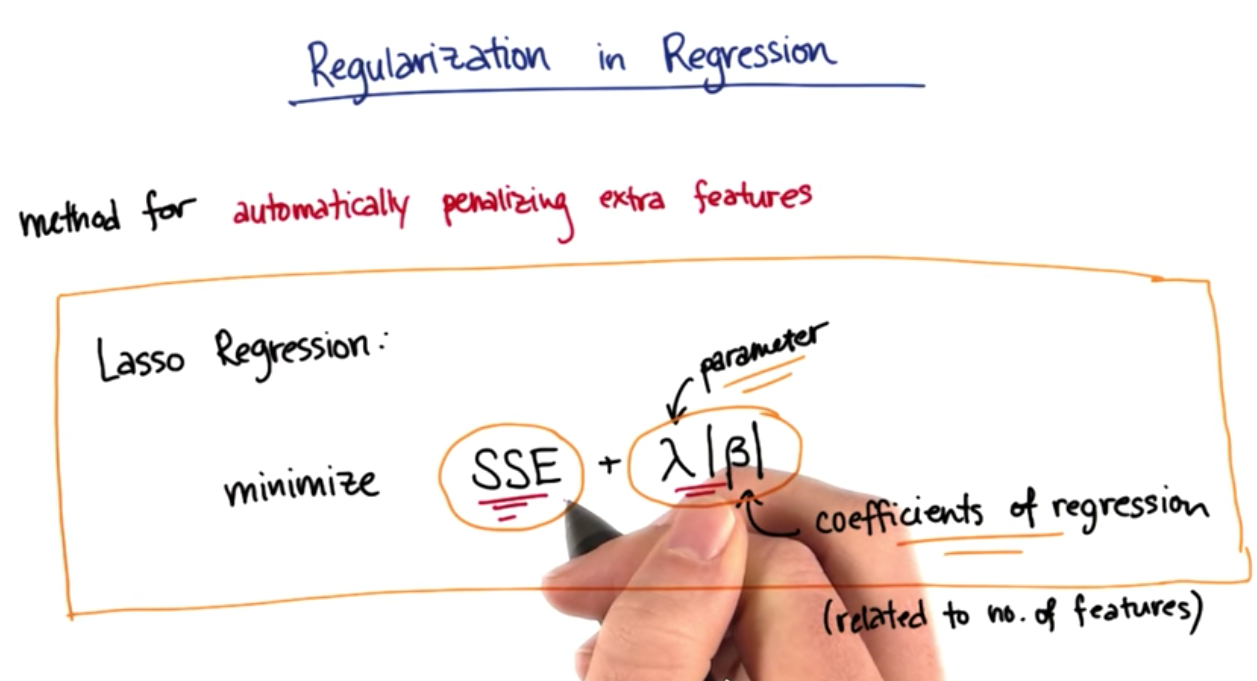

In [6]:
Image('regularizationregression.png')

## Lasso in sklearn


http://scikit-learn.org/stable/modules/linear_model.html#lasso

```
import sklearn.linear_model.Lasso
features, labels = GetMyData()
regression = Lasso()
regression.fit(features, labels)
regression.predict([2,4]) # if predicting for test feature [2,4]
print regression.coef_
```

If "regression.coef_" returns [0.7, 0.0], only one feature really matter. (All discriminating power comes from the first feature.